# Aprendizado Não-Supervisionado (Clustering)

## K-Means Clustering

In [1]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('store.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.columns = ['IdCliente', 'Gênero', 'Idade', 'Renda Anual',
       'Nivel de Gasto (1-100)']

In [6]:
data.head()

,IdCliente,Gênero,Idade,Renda Anual,Nivel de Gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.set_index('IdCliente', inplace=True)

In [8]:
df = data[['Renda Anual', 'Nivel de Gasto (1-100)']]

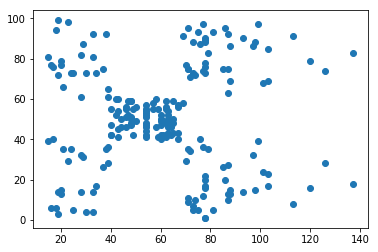

In [9]:
plt.scatter(df['Renda Anual'], df['Nivel de Gasto (1-100)'])

# Identificar quantidade de Clusters
Método Elbow (Cotovelo)

In [10]:
from sklearn.cluster import KMeans

In [11]:
X = df.values

In [12]:
X.shape

(200, 2)

Text(0, 0.5, 'Variações')

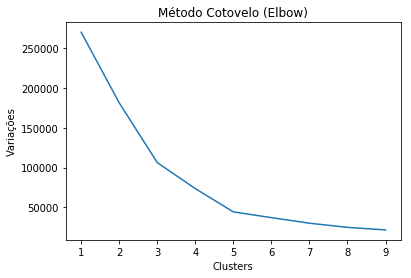

In [13]:
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')

In [14]:
kmeans_final = KMeans(n_clusters=5)

In [15]:
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
cluster_pred = kmeans_final.predict(X)

In [17]:
cluster_centro = kmeans_final.cluster_centers_

In [18]:
cluster_centro

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

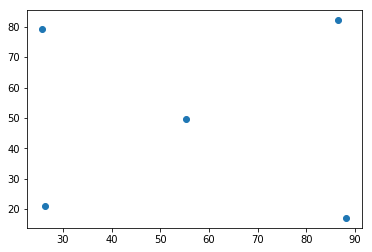

In [19]:
plt.scatter(cluster_centro[:,0],cluster_centro[:,1])

In [20]:
X[cluster_pred==3, 0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

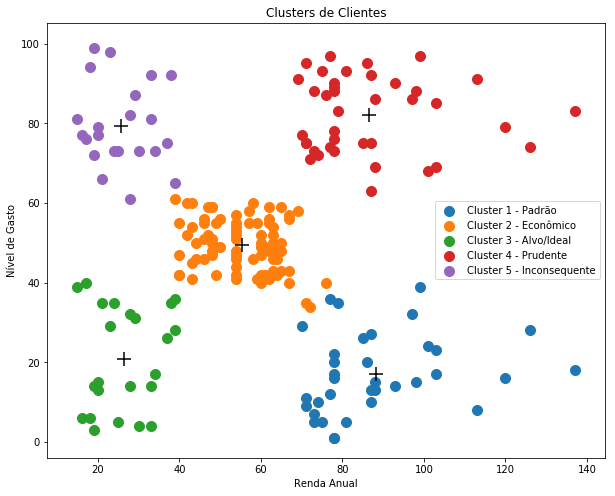

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1],s=100, label='Cluster 1 - Padrão')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1],s=100, label='Cluster 2 - Econômico')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1],s=100, label='Cluster 3 - Alvo/Ideal')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1],s=100, label='Cluster 4 - Prudente')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1],s=100, label='Cluster 5 - Inconsequente')
plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gasto')
plt.show()